# Project: Investigate a Dataset - [No-Show Appointments 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendations">Recommendations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Hi! I'm Neto Anyama and this is my first technical project for this nanodegree course. I cleaned, analyzed and visualized the No-Show Appointments dataset, obtained from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments?page=3). 
The dataset contained over 100,000 entries, arranged over the following columns:
   * PatientId: Each patient's unique identification number.
   * AppointmentID: Each patient's unique identification number for each scheduled appointment.
   * Gender: Female (F) or Male (M)
   * ScheduledDay: The date and time each appointment was scheduled.
   * AppointmentDay: The actual date of each scheduled appointment.
   * Age: Patients' ages.
   * Neighbourhood: where each patient lives
   * Scholarship: whether or not the patient is enrolled in [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), a welfare program set up by the Government of Brazil, between 2003 and 2021.
   * Hipertension: records of whether each patient has hypertension or not.
   * Diabetes: records of whether each patient has diabetes or not.
   * Alcoholism: records of whether each patient suffers from chronic alcoholism or not.
   * Handcap: records of whether each patient has some sort of handicap or not.
   * SMS_received: records of whether each patient received an SMS reminder for their scheduled appointment or not.
   * No-Show: records of whether or not a patient met an appointment. Here, 'No' means the patient was not a no show, i.e. the patient kept the appointment.

   *For all the records from Scholarship to SMS_received, 1 means positive (or received) or negative (or not received).*


### Question(s) for Analysis
>At a glance, before getting into the rest of the process, I posed a few questions to be answered at the end of this analysis. These questions guided further wrangling and analysis of the data.

   1. What percentage of patients __kept__ their scheduled appointments?
   2. Which gender is more likely to __schedule__ an appointment?
   3. Patients of which age groups are most and least likely to __schedule__ an appointment? Least likely?
       * These questions reflect on [health seeking behaviour](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6143883/#:~:text=Healthcare%20seeking%20behaviour%20(HSB)%20has,behaviour%20or%20sick%2Dterm%20behaviour) of patients.     
   4. Which gender is more likely to __keep__ an appointment?
   5. Patients of which age groups are most and least likely to __keep__ an appointment? 
   6. From what neighbourhood do the most patients who keep their appointments come? 
   7. From what neighbourhood do the fewest patients who keep their appointments come? 
   8. How many patients on Bolsa Familia keep their appointments?
   9. Do certain conditions (in this case, hypertension, diabetes, alcoholism and handicap) affect showing up for appointments?
   10. Does receiving an SMS reminder help patients keep their appointments?


In [66]:
# Import statements of all the packages that I used.
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

In [67]:
import pandas as pd
ns_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
ns_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

I imported pandas using the `import pandas as pd` code. Then I created the dataframe __ns_df__ (where ns means no show), using the `read_csv` function. Using the `ns_df.head()` function, I viewed the first 5 entries.


### General Properties

Using the `ns_df.head()` function, I viewed the first 5 entries.

In [68]:
# Load your data and print out a few lines. Perform operations to inspect data
ns_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessment 
After successfully importing pandas and reading the data, it was time to _assess_ the data. 

Assessment involves checking for null values, missing values, wrong datatypes, duplicated values, misspellings, and wrong labelling. These bits of information, except duplicates, were obtained using pandas'  `ns_df.info()` function.

In [69]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A glance through the given result above showed the following inconsistencies:
    
   1. ScheduledDay and AppointmentDay were in the `object` (string) datatype, instead of its proper `datetime` type.
   2. ScheduledDay and AppointmentDay are going to require renaming to 'Schedule Date' and 'Appointment Date' respectively.
   3. The word Hypertension was wrongly spelled as 'Hipertension'.
   4. Handicap was misspelled 'Handcap'.
   5. Appointment ID was going to be dropped, as I felt it irrelevant to my analysis.
   6. SMS_received was going to need its values changed from 0 and 1 to 'not received' and 'received' respectively, for clarity.
   7. All the labels are going to require renaming to lower cases, with an underscore(_) replacing the hyphen (-) and space as required.
    
   Interestingly, there are no null values.
   
   Next, I checked for duplicates. There were no duplicated values.

In [70]:
sum(ns_df.duplicated())

0


### Data Cleaning
I went about cleaning the data as enumerated in the list above:

I first renamed the Hipertension, Handcap, ScheduledDay and AppointmentDay column labels, using pandas' `ns_df.rename`.

In [71]:
ns_df.rename(columns={'Hipertension':'Hypertension', 'Handcap' : 'Handicap',
             'ScheduledDay' : 'Schedule Date', 'AppointmentDay' : 'Appointment Date'}, inplace=True)

Then I set about changing the cases of the labels to lower cases, with an underscore replacing the space as required. This was done using the `lambda` function. The results of this rename were viewed using `ns_df.info()`.

In [2]:
ns_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

NameError: name 'ns_df' is not defined

In [73]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   patientid         110527 non-null  float64
 1   appointmentid     110527 non-null  int64  
 2   gender            110527 non-null  object 
 3   schedule_date     110527 non-null  object 
 4   appointment_date  110527 non-null  object 
 5   age               110527 non-null  int64  
 6   neighbourhood     110527 non-null  object 
 7   scholarship       110527 non-null  int64  
 8   hypertension      110527 non-null  int64  
 9   diabetes          110527 non-null  int64  
 10  alcoholism        110527 non-null  int64  
 11  handicap          110527 non-null  int64  
 12  sms_received      110527 non-null  int64  
 13  no-show           110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
ns_df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Unfortunately, I saw that I didn't clear the hyphen from the 'no-show' column. I utilized the `lambda` function again.

In [75]:
ns_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

Furthermore, I changed the datatype of ScheduleDay (now schedule_date) to `datetime` from `object` (string). The datatypes of hypertension, diabetes, alcoholism and handicap were also changed to `object` from `int`. This was because I figured the entries being integers aren't going to be too useful to me, as they represent positive (1) and negative (0).

As usual, the results were viewed using `ns_df.info()`.

In [76]:
ns_df['schedule_date']=ns_df['schedule_date'].astype('datetime64[ns]')

In [77]:
ns_df = ns_df.astype({"hypertension":"object","diabetes":"object","alcoholism":"object","handicap":"object",
"sms_received":"object"})

I noticed that I'd forgotten to change the datatype of 'appointment_date' to its proper `datetime` format. So I fixed that right away.

In [78]:
ns_df['appointment_date']=ns_df['appointment_date'].astype('datetime64[ns]')
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patientid         110527 non-null  float64       
 1   appointmentid     110527 non-null  int64         
 2   gender            110527 non-null  object        
 3   schedule_date     110527 non-null  datetime64[ns]
 4   appointment_date  110527 non-null  datetime64[ns]
 5   age               110527 non-null  int64         
 6   neighbourhood     110527 non-null  object        
 7   scholarship       110527 non-null  int64         
 8   hypertension      110527 non-null  object        
 9   diabetes          110527 non-null  object        
 10  alcoholism        110527 non-null  object        
 11  handicap          110527 non-null  object        
 12  sms_received      110527 non-null  object        
 13  no_show           110527 non-null  object        
dtypes: d

In my questions listed above, I asked 2 questions using patients' age groups. However, there is no column with that. So I had to create mine using pandas' `cut` function. 

First, I defined the age groups using the information obtained [here](https://bmcneurol.biomedcentral.com/articles/10.1186/s12883-020-01888-w).

   * Paediatric (0–14)
   * Youth (15–47) 
   * Middle Age (48-63)
   * Elderly (≥64)

At this point, I used `numpy` and the steps from GeeksForGeeks' blog to choose a random number from the sets I already defined and cut the dataframe to make my new column. The lowest age given was 0, while the highest was 115. However, I decided to make my upper limit 116 so as to comfortably accommodate 115.

I defined the bin edges using the lower limits of the defined age groups (0, 15, 48, 64, 116). Also, there are 110,527 non-null entries.

In [79]:
np.random.randint(0, 116, 110527)

array([ 61,  49,  91, ..., 105,  47,  79])

In [80]:
bin_edges = [0, 15, 48, 64, 116]
bin_names = ['paed', 'youth', 'mid_age', 'elderly']
ns_df['age_group']= pd.cut(ns_df['age'], bin_edges, labels=bin_names)

I checked that my work was done right. 

In [81]:
ns_df.head()

,patientid,appointmentid,gender,schedule_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,mid_age
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,mid_age
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,mid_age
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,paed
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,mid_age


But, when I used `ns_df.info()`...

In [82]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patientid         110527 non-null  float64       
 1   appointmentid     110527 non-null  int64         
 2   gender            110527 non-null  object        
 3   schedule_date     110527 non-null  datetime64[ns]
 4   appointment_date  110527 non-null  datetime64[ns]
 5   age               110527 non-null  int64         
 6   neighbourhood     110527 non-null  object        
 7   scholarship       110527 non-null  int64         
 8   hypertension      110527 non-null  object        
 9   diabetes          110527 non-null  object        
 10  alcoholism        110527 non-null  object        
 11  handicap          110527 non-null  object        
 12  sms_received      110527 non-null  object        
 13  no_show           110527 non-null  object        
 14  age_

There are 106,987 non-null values, instead of the expected 110,527. On closer inspection (which I did not include here), the null values were seen only when the age was 0. I opened the csv file in Excel and used the COUNTIF function to determine how many of such values were there. 

Coincidentally, there were 3539 values, which was the exact number I needed. So, I simply filled in the null values (`fillna`) with 'paed', which is where the age 0 is supposed to fall.

In [83]:
ns_df["age_group"].fillna("paed", inplace = True)
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patientid         110527 non-null  float64       
 1   appointmentid     110527 non-null  int64         
 2   gender            110527 non-null  object        
 3   schedule_date     110527 non-null  datetime64[ns]
 4   appointment_date  110527 non-null  datetime64[ns]
 5   age               110527 non-null  int64         
 6   neighbourhood     110527 non-null  object        
 7   scholarship       110527 non-null  int64         
 8   hypertension      110527 non-null  object        
 9   diabetes          110527 non-null  object        
 10  alcoholism        110527 non-null  object        
 11  handicap          110527 non-null  object        
 12  sms_received      110527 non-null  object        
 13  no_show           110527 non-null  object        
 14  age_

I noticed the 'schedule_date' column contained both the date and time of the appointment, but I just need the date. So I decided to extract the date from the entries. So I used [this](https://www.codegrepper.com/code-examples/python/extract+date+from+datetime+pandas) example from Grepper as a guide to perform the action.

In [84]:
ns_df['schedule_date']=pd.to_datetime(ns_df['schedule_date']).dt.date
ns_df.head()

,patientid,appointmentid,gender,schedule_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,mid_age
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,mid_age
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,mid_age
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,paed
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,mid_age


Next, I dropped the column 'appointmentid' using pandas' `drop` statement.

In [85]:
ns_df.drop(['appointmentid'], axis=1, inplace=True)
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patientid         110527 non-null  float64       
 1   gender            110527 non-null  object        
 2   schedule_date     110527 non-null  object        
 3   appointment_date  110527 non-null  datetime64[ns]
 4   age               110527 non-null  int64         
 5   neighbourhood     110527 non-null  object        
 6   scholarship       110527 non-null  int64         
 7   hypertension      110527 non-null  object        
 8   diabetes          110527 non-null  object        
 9   alcoholism        110527 non-null  object        
 10  handicap          110527 non-null  object        
 11  sms_received      110527 non-null  object        
 12  no_show           110527 non-null  object        
 13  age_group         110527 non-null  category      
dtypes: c

My last step of cleaning the data involved changing the values under sms_received from 0 and 1 to 'not received' and 'received' respectively, for clarity. 

In [86]:
ns_df.sms_received.replace(0, 'not received', inplace=True)
ns_df.sms_received.replace(1, 'received', inplace=True)
ns_df.head()

,patientid,gender,schedule_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,not received,No,mid_age
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,not received,No,mid_age
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,not received,No,mid_age
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,not received,No,paed
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,not received,No,mid_age


### Saving the Cleaned Dataset.

Finally, the data is clean! So, I saved the cleaned data in a fresh csv file, ready to be analyzed.

In [87]:
ns_df.to_csv('clean_no_show.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Now, it is time to perform exploratory data analysis: visualize the data and answer the questions. To do this, I imported `pandas` to load and read the cleaned data, `seaborn` and `matplotlib.pyplot` and `%matplotlib inline` to visualize view my visualizations as I go. To reiterate, and for ease of the reader, here are the questions:

   1. What percentage of patients __kept__ their scheduled appointments?
   2. Which gender is more likely to __schedule__ an appointment?
   3. Patients of which age groups are most and least likely to __schedule__ an appointment? 
   4. Which gender is more likely to __keep__ an appointment?
   5. Patients of which age groups are most and least likely to __keep__ an appointment? 
   6. From what neighbourhood do the most patients who keep their appointments come? 
   7. From what neighbourhood do the fewest patients who keep their appointments come? 
   8. How many patients on Bolsa Familia keep their appointments?
   9. Do certain conditions (in this case, hypertension, diabetes, alcoholism and handicap) affect showing up for appointments?
   10. Does receiving an SMS reminder help patients keep their appointments?
   
I decided to use green (#009c3b), yellow (#ffdf00), blue (#002776) and white on grey backgrounds as my main [colours](https://www.python-graph-gallery.com/3-control-color-of-barplots) -- the colours in the Brazilian flag. The hexadecimal codes were obtained from [here](https://en.wikipedia.org/wiki/Flag_of_Brazil).

  Of course, I read the cleaned data using `pandas`.

In [88]:
clean_ns = pd.read_csv('clean_no_show.csv')

### Research Question 1: What percentage of patients __kept__ their scheduled appointments?

We used the `value_counts()` function to find both the absolute (actual number) and relative (percentage) values.

In [89]:
clean_ns['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [90]:
clean_ns['no_show'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: no_show, dtype: float64

From the above, out of 110,527 patients, __88,208 (79.81%)__ of them showed up to their scheduled appointments. __22,319 (20.19%)__, on the other hand, did not. I represented this using a donut chart, using code I learned [here](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f).

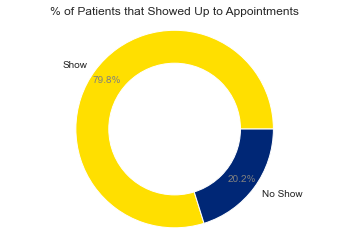

In [91]:
y = [79.81, 20.19]
mylabels = ['Show', 'No Show']
patches, texts, autotexts=plt.pie(y, labels = mylabels, radius=1.5, colors=('#ffdf00', '#002776'),
       autopct='%1.1f%%', pctdistance=0.85)

for autotext in autotexts:
    autotext.set_color('grey')
    
centre_circle = plt.Circle((0,0),1.0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('% of Patients that Showed Up to Appointments')
plt.axis('equal')  

plt.show();

From the above donut chart, it is seen that **79.8%** of patients showed up for their appointments.

### Research Question 2: Which gender is more likely to __schedule__ an appointment?

To answer this, I needed to know how many men and women make up the dataset. So I used the `value_counts()` command. Then I plotted a bar chart to visualize my results. 

In [92]:
clean_ns['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

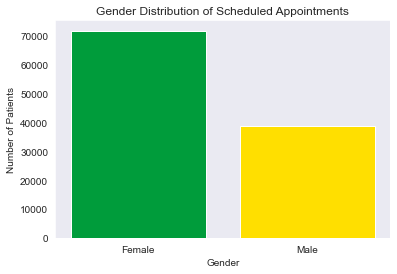

In [93]:
# plot
locations = [1, 2]
heights = [71840, 38687]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels, color=('#009c3b', '#ffdf00'))
plt.title('Gender Distribution of Scheduled Appointments')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

The bar chart shows that **women** are more likely to schedule (**71840 F > 38687 M**) appointments than men.

### Research Question 3: Patients of which age groups are most and least likely to schedule an appointment? 
    
To answer this, I followed the same procedure as the previous question: `value_counts()` then bar chart.

In [94]:
# age group
clean_ns['age_group'].value_counts()

youth      47370
paed       24469
mid_age    24286
elderly    14402
Name: age_group, dtype: int64

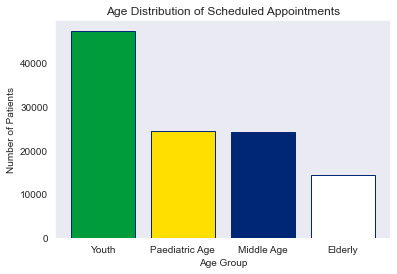

In [95]:
# plot
locations = [1, 2, 3, 4]
heights = [47370, 24469, 24286, 14402]
labels = ['Youth', 'Paediatric Age', 'Middle Age', 'Elderly']
plt.bar(locations, heights, tick_label=labels, color=('#009c3b', '#ffdf00', '#002776', '#ffffff'), 
        edgecolor = ('#002776', '#002776', '#002776', '#002776'))
plt.title('Age Distribution of Scheduled Appointments')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

The next few answered questions were based on who actually _kept_ their appointments.

It was going to be a little clumsy to work with the original clean dataframe. So, I created a whole new dataframe,`show_up`, containing only patients who showed up to their appointments, using the `query()` command. It is important to note here that "No" means that the patients _weren't_ no-shows, meaning that they kept their appointments.

In [96]:
show_up = clean_ns.query('no_show == "No"')
show_up.head(3)

,patientid,gender,schedule_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,not received,No,mid_age
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,not received,No,mid_age
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,not received,No,mid_age


The above bar charts show that: 
1. Patients in the **Youth** age group are most likely to schedule (**42.86%**) an appointment. 
2. Patients in the **Elderly** age group are least likely to schedule (**13.02%**) an appointment.

### Research Questions 4 & 5: Which gender is more likely to keep an appointment? Patients of which age groups are most and least likely to keep an appointment?

I decided to use a pie chart to visualize these. This [blog post](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) on Medium really helped me write the required code. 

In [97]:
show_up['gender'].value_counts(normalize=True)

F    0.648989
M    0.351011
Name: gender, dtype: float64

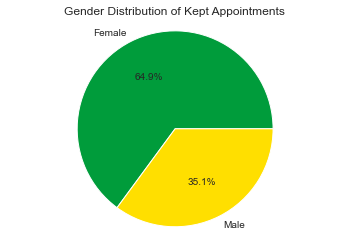

In [98]:
y = [64.90, 35.10]
mylabels = ['Female', 'Male']
plt.pie(y, labels = mylabels, radius=1.5, colors=('#009c3b', '#ffdf00'),
       autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution of Kept Appointments')
plt.show();

In [99]:
show_up['age_group'].value_counts(normalize=True)

youth      0.415098
mid_age    0.229038
paed       0.217905
elderly    0.137958
Name: age_group, dtype: float64

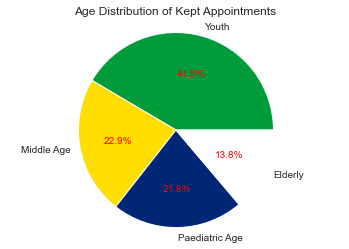

In [100]:
y = [41.51, 22.90, 21.79, 13.80]
mylabels = ['Youth', 'Middle Age','Paediatric Age', 'Elderly']
patches, texts, autotexts=plt.pie(y, labels = mylabels, radius=2, colors=('#009c3b', '#ffdf00', '#002776', '#ffffff'),
       autopct='%1.1f%%')

for autotext in autotexts:
    autotext.set_color('red')
plt.axis('equal')
plt.title('Age Distribution of Kept Appointments')
plt.show();

 The pie charts show that:
1. **Women** are more likely to keep (**64.9%**) appointments than men.
2. Patients in the **Youth** age group are most likely to keep (**41.5%**) an appointment. 
3. Patients in the **Elderly** age group are least likely to keep (**13.8%**) an appointment.

### Research Questions 6 & 7: From what neighbourhood do the most patients who keep their appointments come? From what neighbourhood do the fewest patients who keep their appointments come? 

I answered these questions the same way. First, I used the `value_counts` function to view the neighbourhoods in the dataset and how many times they occurred. However, there were 80 and I needed only the top and bottom 5. 

My next step was to create two new dataframes from the `show_up` dataframe: one with only the top 5 (`top_neigh`) and the other with the bottom 5 neighbourhoods (`bottom_neigh`). After creating these queries, I plotted horizontal bar charts for the values and created [functions](https://www.w3schools.com/python/python_functions.asp) stating the top and bottom neighbourhoods. 

In [101]:
def neighbourhood(nbhood):
  print(nbhood + "," + lname)

In [102]:
show_up['neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [103]:
top_neigh = show_up.query('neighbourhood == ["JARDIM CAMBURI", "MARIA ORTIZ", "RESISTÊNCIA", "JARDIM DA PENHA", "SANTA MARTHA"]')
top_neigh['neighbourhood'].value_counts()

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: neighbourhood, dtype: int64

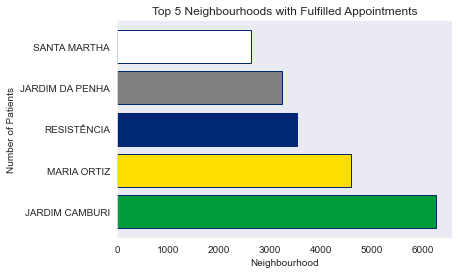

In [104]:
locations = [1, 2, 3, 4, 5]
heights = [6252, 4586, 3525, 3246, 2635]
labels = ["JARDIM CAMBURI", "MARIA ORTIZ", "RESISTÊNCIA", "JARDIM DA PENHA", "SANTA MARTHA"]
plt.barh(locations, heights, tick_label=labels, 
         color=('#009c3b', '#ffdf00', '#002776', 'grey', '#ffffff'), 
         edgecolor = ('#002776', '#002776', '#002776', '#002776', '#002776'))
plt.title('Top 5 Neighbourhoods with Fulfilled Appointments')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

In [105]:
top_nbhoods = ["JARDIM CAMBURI", "MARIA ORTIZ", "RESISTÊNCIA", "JARDIM DA PENHA", "SANTA MARTHA"]

In [106]:
def neighbourhood():
  print("The top neighbourhood is " + top_nbhoods[0])

neighbourhood()

The top neighbourhood is JARDIM CAMBURI


In [107]:
bottom_neigh = show_up.query('neighbourhood == ["PONTAL DE CAMBURI", "ILHA DO BOI", "ILHA DO FRADE", "AEROPORTO", "PARQUE INDUSTRIAL"]')
bottom_neigh['neighbourhood'].value_counts()

PONTAL DE CAMBURI    57
ILHA DO BOI          32
ILHA DO FRADE         8
AEROPORTO             7
PARQUE INDUSTRIAL     1
Name: neighbourhood, dtype: int64

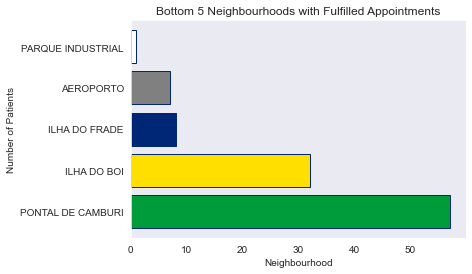

In [108]:
locations = [1, 2, 3, 4, 5]
heights = [57, 32, 8, 7, 1]
labels = ["PONTAL DE CAMBURI", "ILHA DO BOI", "ILHA DO FRADE", "AEROPORTO", "PARQUE INDUSTRIAL"]
plt.barh(locations, heights, tick_label=labels, 
         color=('#009c3b', '#ffdf00', '#002776', 'grey', '#ffffff'), 
         edgecolor = ('#002776', '#002776', '#002776', '#002776', '#002776'))
plt.title('Bottom 5 Neighbourhoods with Fulfilled Appointments')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

In [109]:
bottom_nbhoods = ["PONTAL DE CAMBURI", "ILHA DO BOI", "ILHA DO FRADE", "AEROPORTO", "PARQUE INDUSTRIAL"]

In [110]:
def bot_neighbourhood():
  print("The bottom neighbourhood is " + bottom_nbhoods[4])

bot_neighbourhood()

The bottom neighbourhood is PARQUE INDUSTRIAL


Going by the above charts, The __Jardim Camburi__ neighbourhood had the most patients keeping their appointments with __6252__ patients, while __Parque Industrial__ had the fewest, with only __1__ patient. 


### Research Question 8: Do patients on Bolsa Familia keep their appointments more?

Now, to answer this, we created a dataframe, `bolsa_fam` containing only the patients that were on Bolsa Familia. Again, I used the query function to keep the code easy and short. Then, I used the `value_counts()` function to determine how many and what percentage of those 10,861 patients actually showed up to their appointments.

In [111]:
bolsa_fam = clean_ns.query('scholarship == 1')
bolsa_fam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861 entries, 12 to 110482
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientid         10861 non-null  float64
 1   gender            10861 non-null  object 
 2   schedule_date     10861 non-null  object 
 3   appointment_date  10861 non-null  object 
 4   age               10861 non-null  int64  
 5   neighbourhood     10861 non-null  object 
 6   scholarship       10861 non-null  int64  
 7   hypertension      10861 non-null  int64  
 8   diabetes          10861 non-null  int64  
 9   alcoholism        10861 non-null  int64  
 10  handicap          10861 non-null  int64  
 11  sms_received      10861 non-null  object 
 12  no_show           10861 non-null  object 
 13  age_group         10861 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.2+ MB


In [112]:
bolsa_fam.no_show.value_counts()

No     8283
Yes    2578
Name: no_show, dtype: int64

In [113]:
bolsa_fam.no_show.value_counts(normalize=True)

No     0.762637
Yes    0.237363
Name: no_show, dtype: float64

__8283__ out of 10861 (__76.26%__) patients on Bolsa Familia showed up to their appointments. This is a pretty wide margin, and a positive sign. 


### Research Question 9: Do certain conditions (in this case, hypertension, diabetes, alcoholism and handicap) affect showing up for appointments?

Here, I'm simply going to find the percentages of patients who had any of the conditions provided and _still_ showed up for appointments. To do this, I created individual masks for each condition containing which of the patients had them using the original clean dataframe (`clean_ns`). Then, using the `percent(x)` [function](https://www.packt.com/python-functions-avoid-repeating-code/) which I created, I found the necessary percentages. I used this function because there are 4 conditions which will make writing the same code redundant.

For the patients living with handicaps, I created the query differently. There are 4 grades of handicap, outside patients without handicap. The dataset did not provide what each grade stood for, unfortunately. So, I had to create one using all the grades to at least represent the patients that had _some_ sort of handicap.

Finally, I created a multiple bar chart visualizing these differences.

In [114]:
def percent(x):
    'this function returns percentage values'
    return x.no_show.value_counts(normalize=True).to_frame()

In [115]:
htn = clean_ns.query('hypertension == 1')
percent(htn)

,no_show
No,0.82698
Yes,0.17302


In [116]:
dbt = clean_ns.query('diabetes == 1')
percent(dbt)

,no_show
No,0.819967
Yes,0.180033


In [117]:
alc = clean_ns.query('alcoholism == 1')
percent(alc)

,no_show
No,0.798512
Yes,0.201488


In [118]:
hdc = clean_ns.query('handicap == (1, 2, 3, 4)')
percent(hdc)

,no_show
No,0.818385
Yes,0.181615


In [119]:
Condition=['HTN', 'Diabetes', 'Alcoholism',
              'Handicap']
show_percent=[82.7, 82, 79.85, 81.84]
ns_percent= [17.3, 18, 20.15, 18.16]

In [120]:
ind = np.arange(len(show_percent))  # the x locations for the groups
width = 0.35       # the width of the bars

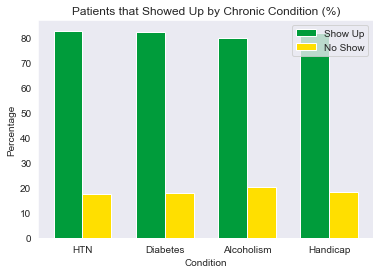

In [121]:
# plot bars
show_bars = plt.bar(ind, show_percent, width, color='#009c3b', alpha=1, label='Show Up')
ns_bars = plt.bar(ind + width, ns_percent, width, color='#ffdf00', alpha=1, label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Condition')
plt.title('Patients that Showed Up by Chronic Condition (%)')
locations = ind + width / 2  # xtick locations
labels = Condition  # xtick labels
figsize=(10,8)
plt.xticks(locations, labels);

# legend
plt.legend(frameon=True);

__82.70%__ of patients that had hypertension kept their appointments , __82.00%__ for patients with diabetes, __79.85%__ for patients were suffering from chronic alcoholism and __81.84%__ for patients that had any grade of handicap.


### Research Question 10: Does receiving an SMS reminder help patients keep their appointments?

To do this, I created a mask, again using `query`, containing only the patients who received the SMS reminders. Then I
simply found the value counts of each variable under the no_show column. This way, I obtained the number, out of the 35482 patients, that showed up to their appointments after they received the SMS reminder. The results were plotted in a donut chart.

In [122]:
sms_rem = clean_ns.query('sms_received == "received"')
sms_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 11 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientid         35482 non-null  float64
 1   gender            35482 non-null  object 
 2   schedule_date     35482 non-null  object 
 3   appointment_date  35482 non-null  object 
 4   age               35482 non-null  int64  
 5   neighbourhood     35482 non-null  object 
 6   scholarship       35482 non-null  int64  
 7   hypertension      35482 non-null  int64  
 8   diabetes          35482 non-null  int64  
 9   alcoholism        35482 non-null  int64  
 10  handicap          35482 non-null  int64  
 11  sms_received      35482 non-null  object 
 12  no_show           35482 non-null  object 
 13  age_group         35482 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 4.1+ MB


In [123]:
sms_rem.no_show.value_counts()

No     25698
Yes     9784
Name: no_show, dtype: int64

In [124]:
sms_rem.no_show.value_counts(normalize=True)

No     0.724255
Yes    0.275745
Name: no_show, dtype: float64

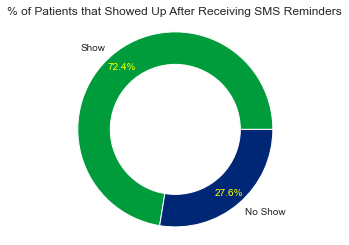

In [125]:
y = [72.43, 27.57]
mylabels = ['Show', 'No Show']
patches, texts, autotexts=plt.pie(y, labels = mylabels, radius=1.5, colors=('#009c3b', '#002776'),
       autopct='%1.1f%%', pctdistance=0.85)

for autotext in autotexts:
    autotext.set_color('yellow')
    
centre_circle = plt.Circle((0,0),1.0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('% of Patients that Showed Up After Receiving SMS Reminders')
plt.axis('equal')  

plt.show();

__72.43%__ of patients showed up to their appointments after receiving the SMS reminder, showing that the reminders were important for them to show up.

<a id='conclusions'></a>
## Conclusions

These are the inferences made from each visualization in the EDA section: 
1. **Women** are more likely to schedule (**71840 F > 38687 M**) and keep (**64.9%**) appointments.
2. Patients in the **Youth** age group are most likely to schedule (**42.86%**) and keep (**41.5%**) an appointment. 
3. Patients in the **Elderly** age group are least likely to schedule (**13.02%**) and keep (**13.8%**) an appointment.
4. The __Jardim Camburi__ neighbourhood had the most patients keeping their appointments with __6252__ patients, while __Parque Industrial__ had the fewest, with only __1__ patient. 
5. __8283__ out of 10861 (__76.26%__) patients on Bolsa Familia showed up to their appointments. This is a pretty wide margin, and a positive sign. 
6. __82.70%__ of patients that had hypertension kept their appointments , __82.00%__ for patients with diabetes, __79.85%__ for patients were suffering from chronic alcoholism and __81.84%__ for patients that had any grade of handicap.
7. __72.43%__ of patients showed up to their appointments after receiving the SMS reminder.

### Limitations
1. The economic states of the neighbourhoods were not given or suggested, making it difficult to provide insight as to why more patients showed up to appointments from certain neighbourhoods. 
2. The dataset did not provide what each grade of handicap stood for, which impeded my ability to draw further conclusions on the correlation between handicap and showing up to appointments.

<a id='recommendations'></a>
## Recommendations
1. Men need to improve on their general health seeking behaviour.
2. The elderly should be counselled to attend their appointments. If some of them are too old to go on their own, arrangements should be made to either convey them to their nearest hospital or bring two medical personnel to their homes to care for them.
3. Neighbourhoods with the fewest patients who attended their appointments should be researched upon so as to assist them according to their needs.
4. More programs like Bolsa Familia should be created as it is seen to have aided people who otherwise couldn't go to hospital do so. 
5. Sequel to the previous point, it is important to note that 23.74% is still a pretty large number. Therefore, the patients in this category would require more education, sensitization and counselling. Facilities, like clinics, should also be made available to them as required.
6. Chronic illnesses don't seem to be that much of a stumbling block. However, for non-ambulatory patients, arrangements should be made to either convey them to their nearest hospital or bring two medical personnel to their homes to care for them.
7. SMS reminders for appointments should be kept up as they aided patients to keep to the scheduled appointments.

<a id='references'></a>
## References.

1. Bolsa Família: (https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
2. Factors Influening Health-Seeking Behaviour Among Civil Servants in Ibadan, Nigeria:
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6143883/#:~:text=Healthcare%20seeking%20behaviour%20(HSB)%20has,behaviour%20or%20sick%2Dterm%20behaviour)
3. (https://bmcneurol.biomedcentral.com/articles/10.1186/s12883-020-01888-w)
4. randint() Function in Python: (https://www.geeksforgeeks.org/python-randint-function/)
5. Pandas.cut() method in Python: 
(https://www.geeksforgeeks.org/pandas-cut-method-in-python/)
6. “extract date from datetime pandas” Code Answer’s: 
(https://www.codegrepper.com/code-examples/python/extract+date+from+datetime+pandas)
7. Control the color of barplots built with matplotlib: (https://www.python-graph-gallery.com/3-control-color-of-barplots)
8. Flag of Brazil: (https://en.wikipedia.org/wiki/Flag_of_Brazil)
9. Better visualization of Pie charts by MatPlotLib: 
(https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
10. Python Functions: (https://www.w3schools.com/python/python_functions.asp)
11. Python functions – Avoid repeating code: https://www.packt.com/python-functions-avoid-repeating-code/

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Anyama_Project_Resubmission.ipynb'])

1